# 1. 선 그래프 (Line plot) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

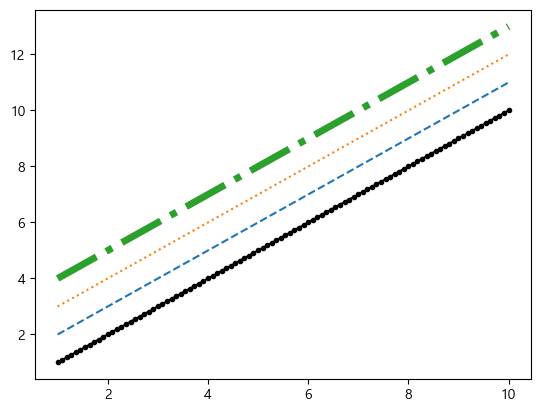

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.linspace(1, 10, num=100) # 1 ~ 10을 100등분(num)한 분위 값으로 이뤄진 1차원 배열을 생성. 
                                # -> 리스트나 시리즈 같이 다양한 자료구조로 변환할 수 있다. (1차원의 자료구조)
x2 = pd.Series(x)
# plt 함수를 이용해서 선그래프 그리기
plt.plot(x, x, marker='.', color='black')
plt.plot(x, x+1, linestyle ='--')
plt.plot(x, x+2, linestyle =':')
plt.plot(x, x+3, linestyle ='-.', linewidth=5)
plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [2]:
import pandas as pd

df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.shape

(12, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   년도           12 non-null     int64
 1   주의보 발령횟수     12 non-null     int64
 2   주의보 발령일수     12 non-null     int64
 3   경보 발령횟수      12 non-null     int64
 4   경보 발령일수      12 non-null     int64
 5   관측일수         12 non-null     int64
 6   최대농도(㎍/㎥/시)  12 non-null     int64
dtypes: int64(7)
memory usage: 800.0 bytes


In [4]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


In [5]:
df.columns[-1]

'최대농도(㎍/㎥/시)'

In [6]:
# tip. '최대농도(㎍/㎥/시)' => '최대농도' -> 컬럼명을 이해하기 편하게 바꾸기(대소문자, 약어)
df.rename(columns = {'최대농도(㎍/㎥/시)':'최대농도'})
df.rename(columns = {df.columns[-1]:'최대농도'}, inplace=True)
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


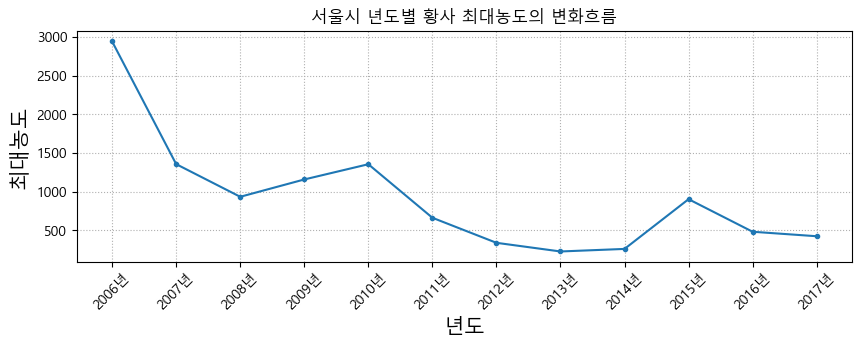

In [13]:
# 년도에 따른 황사 최대 농도의 변화흐름
plt.figure(figsize=(10, 3))  # tip. 시계열 그래프의 경우 가로가 긴 편이 변화를 보기 편함
                             # tip. 그래프의 크기를 어떻게 설정하느냐에 따라 사람이 느끼기에 다르다. ex) y축이 큰 경우 떨어지는 추이가 커보임
plt.plot(df['년도'], df['최대농도'], marker='.')
plt.title('서울시 년도별 황사 최대농도의 변화흐름')
plt.xlabel('년도', fontsize=15)
plt.ylabel('최대농도', fontsize=15)
plt.grid(True, linestyle=':')

plt.xticks(df['년도'], 
           labels=[str(y)+'년' for y in df['년도']],  # tick 라벨의 size == ticks의 size
           rotation=45                               # label 기울기 바꾸기
          )        # 눈금의 위치. labels=ticks라벨에 사용할 문자열 리스트
plt.grid(True, linestyle=':')

plt.show()

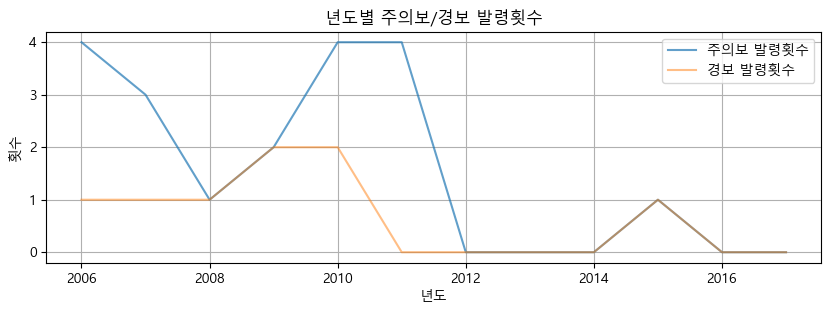

In [19]:
# 년도에 따른 주의보/경보 발령횟수의 변화 ==> 하나의 subplot(axes)에 같이 그리기
plt.figure(figsize=(10, 3))

plt.plot(df['년도'], df['주의보 발령횟수'], alpha=0.7, label = '주의보 발령횟수') # alpha(투명도): 0(투명)~1(불투명)
plt.plot(df['년도'], df['경보 발령횟수'], alpha=0.5, label = '경보 발령횟수')

plt.title('년도별 주의보/경보 발령횟수')
plt.xlabel('년도')
plt.ylabel('횟수')

plt.legend()  # 범례나오도록 처리
plt.grid(True)

plt.show()

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

In [28]:
df[['관측일수', '최대농도']].agg(['min', 'max'])

,관측일수,최대농도
min,1,226
max,15,2941


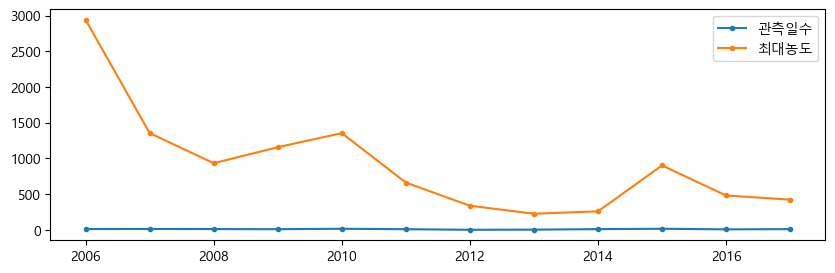

In [30]:
# 년도별 관측일수와 최대 농도의 변화흐름을 하나의  axes에 그리기
# x: 년도, y: 관측일수, 최대농도
plt.figure(figsize=(10, 3))

plt.plot(df['년도'], df['관측일수'], label='관측일수', marker='.')
plt.plot(df['년도'], df['최대농도'], label='최대농도', marker='.')

plt.legend()
plt.show()

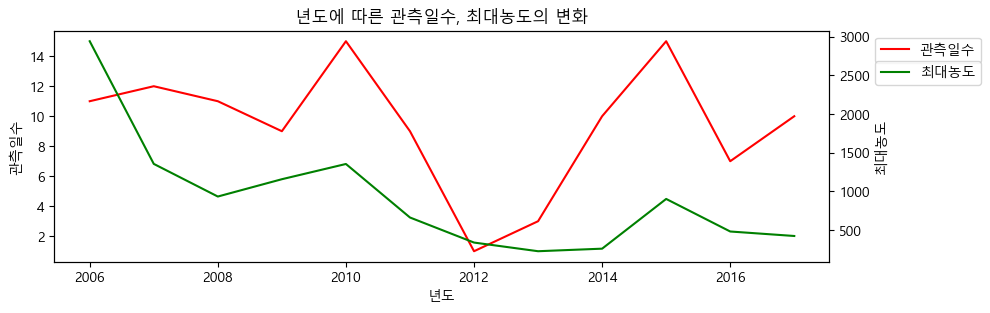

In [51]:
# twinx()를 이용해서 x축은 같이 사용하고 y는 따로 사용하도록 처리
plt.figure(figsize=(10, 3))

ax1 = plt.gca()    # 관측일수
ax2 = ax1.twinx()  # ax1과 x축을 공유하는 새로운 subplot을 생성

ax1.plot(df['년도'], df['관측일수'], label='관측일수', color='r')
ax2.plot(df['년도'], df['최대농도'], label='최대농도', color='g')
# 다른 그래프에 그렸기 때문에 결과 값이 전부 파란색으로 나온다. -> color 지정해 줘야함

ax1.set_title('년도에 따른 관측일수, 최대농도의 변화')
ax1.set_xlabel('년도')

# 축의 라벨 값을 따로 설정해줘야함
ax1.set_ylabel('관측일수')
ax2.set_ylabel('최대농도')

# plt.legend() -> 두번째 것만 보여줌

# ax1.legend() -> 위치가 겹쳐서 보여줌
# ax2.legend()

ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.9))

plt.show()

### legend 위치 지정
- 미리 지정된 위치로 잡기.
    - legend(loc="상하위치 좌우위치")
        - 상하: upper, center, lower
        - 좌우: left, center, right
        - 정가운데: "center"
        - "best":최적의 위치를 알아서 잡아준다.(Default)
- 원하는 위치를 직접 설정
    - legend(bbox_to_anchor=(x, y), loc="box의 상하, 좌우 위치")
    - bbox_to_anchor
        - 전체 subplot의 x축과 y축의 비율
        ```
        하단: (0, 0), (1, 0)
        상단: (0, 1), (1, 1)
        ```
    - loc -> bbox_to_anchor 좌표지정 범례 box의 어느 지점을 붙일 것인지 지정
        - ex) bbox_to_anchor=(1, 1), loc='upper left' : subplot (1, 1) 지점의 범례박스 위/왼쪽 점을 맞춘다.

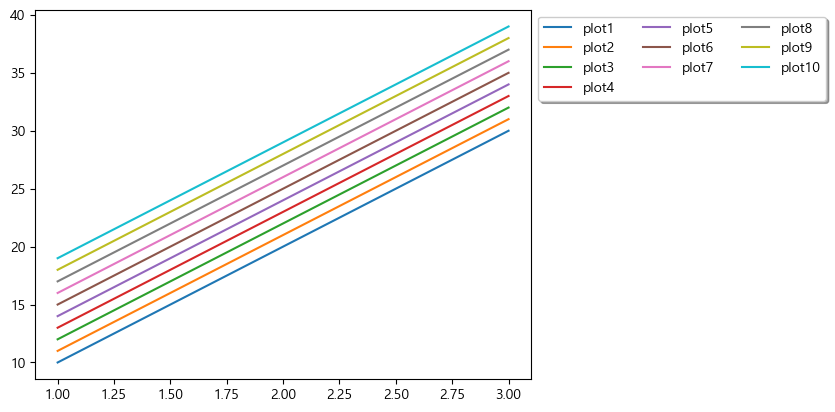

In [62]:
x = [1, 2, 3]
y = np.array([10, 20, 30])

plt.plot(x, y, label = 'plot1')
plt.plot(x, y+1, label = 'plot2')
plt.plot(x, y+2, label = 'plot3')
plt.plot(x, y+3, label = 'plot4')
plt.plot(x, y+4, label = 'plot5')
plt.plot(x, y+5, label = 'plot6')
plt.plot(x, y+6, label = 'plot7')
plt.plot(x, y+7, label = 'plot8')
plt.plot(x, y+8, label = 'plot9')
plt.plot(x, y+9, label = 'plot10')

plt.legend(bbox_to_anchor=(1, 1), loc="upper left",
          ncol=3, # tip. 3열로 보이게 하기
          shadow=True) # 그림자 보이게 하기
plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 정수: 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

In [63]:
x = range(1, 1001, 50)
y = range(1001, 1, -50)
y2 = range(1, 1001, 50)
print(len(x), len(y))

20 20


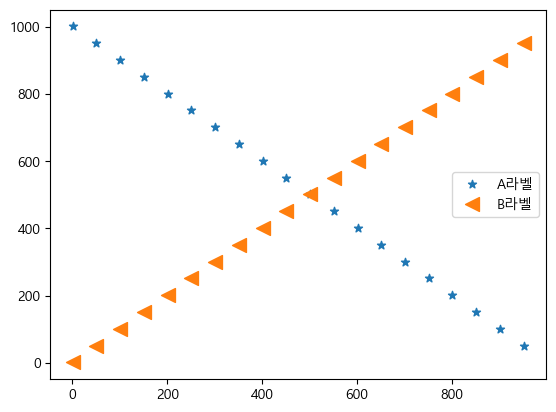

In [80]:
plt.scatter(x, y, label = 'A라벨', marker = "*")
plt.scatter(x, y2, label = 'B라벨', marker = "<", s = 100)

plt.legend()#["A라벨", 'B라벨'])
plt.show()

## 2.3 산점도 활용

###  캐럿(carat)과 가격(Price)간의 상관관계 시각화

In [81]:
df = pd.read_csv('data/diamonds.csv')
df.shape

(53940, 10)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [85]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


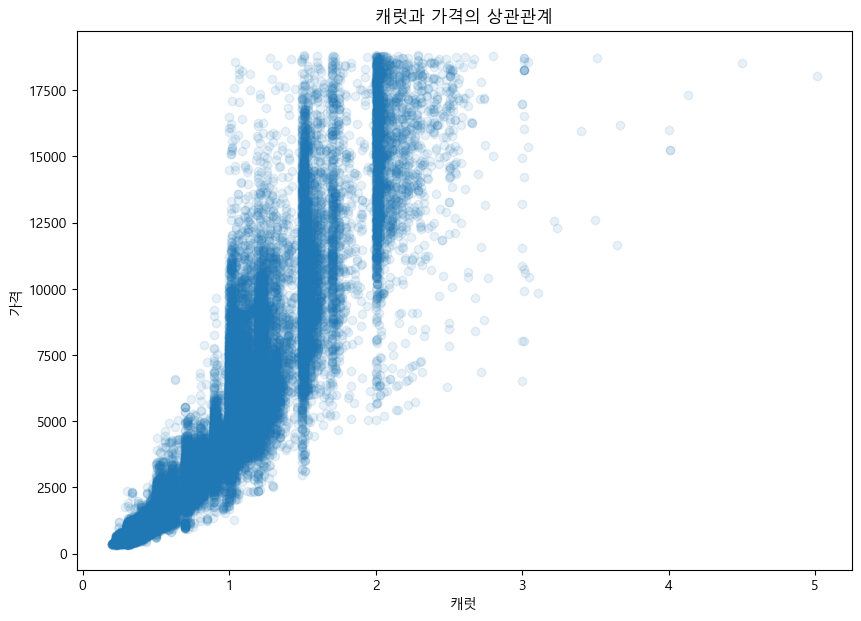

In [98]:
plt.figure(figsize=(10, 7))
plt.scatter(df['carat'], df['price'], #tip. x: 원인, y: 결과
            alpha = 0.1 # 값이 많아지면 곂치는 부분이 많기 때문에 분포를 자세히 확인하기 힘들다 -> 투명도 낮추기
           )  
plt.title('캐럿과 가격의 상관관계')
plt.xlabel("캐럿")
plt.ylabel("가격")
plt.show()

> - 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - 양수: 양의 상관관계(비례관계), 음수: 음의 상관관계(반비례관계)
>             - 양: 0 ~ 1,  음: -1 ~ 0
>         - 절대값 기준 1로 갈수록 강한상관관계, 0으로 갈수록 약한 상관관계
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

In [100]:
# 상관계수 계산
df[['carat', 'price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)